In [2]:
# dependencies
import os
import cv2
import numpy as np
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

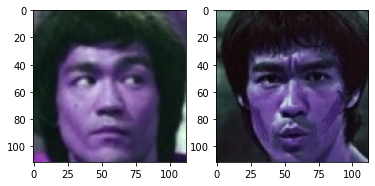

In [30]:
# import images
img1 = cv2.imread('CASIA-WebFace/images/490624/490624_1.jpg')
img2 = cv2.imread('CASIA-WebFace/images/490624/490624_3.jpg')

# plot images
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [34]:
# Call VGGFace model
model_name = "Facenet"
model = DeepFace.build_model(model_name)

In [15]:
# Load all filenames into a list
path = 'CASIA-WebFace/images/' 
all_files = []

# only the first 100 folders / faces
only_first_n_folders = 50

i = 0
for root, dirs, files in sorted(os.walk(path)):
    
    if i == only_first_n_folders:
        break
    for name in files:
        all_files.append(str(root) + "/" + str(name))
        break # take only the first image in the folder
    i += 1
        
print("finished with %d files" % len(all_files))
database = all_files

finished with 49 files


In [48]:
# Split the list to get a subsample of our faces to act as database
X_train, X_test = train_test_split(all_files, test_size=0.99, random_state=1)
# test_size 0.999 gives a train size of 490 random faces
print(len(X_train))
database = X_train

1


Recognized: True | Similarity: 0.18 | Input Face: 490624_2.jpg - Stored Face: 490624_1.jpg

finished


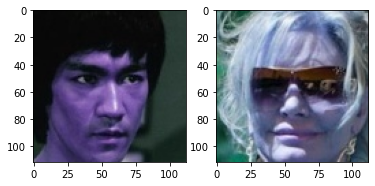

In [18]:
# Validate Images
input_face_name = 'CASIA-WebFace/images/490624/490624_2.jpg'
input_face = cv2.imread(input_face_name)

for stored_face in database:
    
    result = DeepFace.verify(input_face, stored_face, enforce_detection=False, model_name ="Facenet") 
    
    if result['distance'] <= 0.4:
        print("Recognized: %s | Similarity: %.2f | Input Face: %s - Stored Face: %s"
              % (result['verified'], result['distance'], input_face_name[28:], stored_face[28:]))
        
print("\nfinished")

# plot images
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.imread(input_face_name))
axarr[1].imshow(cv2.imread(stored_face))